In [166]:
import scipy.optimize as optimize
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from numpy import random

In [186]:
# Raw Dataframe
df = pd.DataFrame(
    {'Time' : [22, 22, 22, 22, 22, 22, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
     'ul' : [3, 2, 3, 2, 1, 1, 5, 5, 4, 4, 4, 4, 4, 5, 3, 5, 7, 6, 6, 6, 6, 7, 7, 5, 5, 6, 8, 8, 9, 10, 9, 11, 10, 9, 8, 9]}
)
df


,Time,ul
0,22,3
1,22,2
2,22,3
3,22,2
4,22,1
5,22,1
6,44,5
7,44,5
8,44,4
9,44,4


In [168]:

# Getting mean values for datapoints
df_calc = df.groupby('Time').mean().reset_index()
df_calc = df_calc.sort_values('ul', ascending=True)
df_calc

,Time,ul
0,22,2.0
1,44,4.3
2,52,6.1
3,60,9.1


In [169]:
x, y = df_calc['ul'], df_calc['Time']

In [170]:
#This equation is used to determine the relationship of how ul is related to time (x = ul, y = time)

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 13.55051 * x + -0.74653 * x^2 + -1.73702


In [171]:
# Equation to determine 8 ul
def waterfunction(x):
    y = 13.55051 * x + -0.74653 * x ** 2 + -1.73702
    return(y)

In [172]:
# Determine the time for 8 ul and put it in the dataframe

df_calc.loc[3, 'Time'] = waterfunction(8)
df_calc.loc[3, 'ul'] = 8
df_calc

,Time,ul
0,22.00000,2.0
1,44.00000,4.3
2,52.00000,6.1
3,58.88914,8.0


In [173]:
# Come up wiht a new equation where Time is x now and ul is y

x, y = df_calc['ul'], df_calc['Time']

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 13.94674 * x + -0.79141 * x^2 + -2.43169


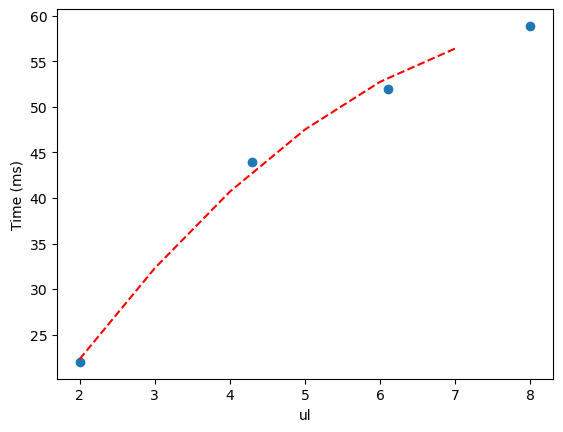

In [174]:
# Graph the equation

x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')
plt.scatter(x = 'ul', y = 'Time', data = df_calc)
plt.ylabel("Time (ms)")
plt.xlabel("ul")
plt.show()

In [175]:
df_calc['ul Opposite'] = [8, 6.1, 4.3, 2]
df_calc

,Time,ul,ul Opposite
0,22.00000,2.0,8.0
1,44.00000,4.3,6.1
2,52.00000,6.1,4.3
3,58.88914,8.0,2.0


In [176]:
x1, y1 = df_calc['ul Opposite'], df_calc['Time']

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x1, y1)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 4.57457 * x + -1.05457 * x^2 + 53.50447


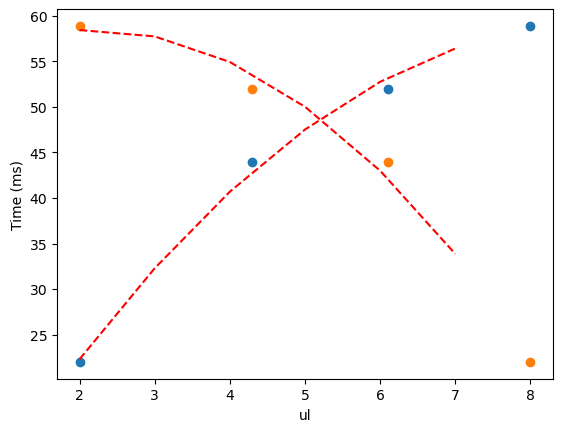

In [177]:
x1_line = arange(min(x1), max(x1), 1)
y1_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')
plt.plot(x1_line, y1_line, '--', color='red')
plt.scatter(x = 'ul', y = 'Time', data = df_calc)
plt.scatter(x = 'ul Opposite', y = 'Time', data = df_calc)
plt.ylabel("Time (ms)")
plt.xlabel("ul")
plt.show()

In [178]:
## Solving where they cross each other

from sympy import symbols, Eq, solve

# Define the symbols and equations
x, y = symbols('x y')
eq1 = Eq(y, 0.26026 * x + -0.00522 * x**2 + 4.79342)
eq2 = Eq(y, -0.15112 * x + 0.00388 * x**2 + 3.44460)

# Solve the system of equations
sol = solve((eq1, eq2), (x, y))

# Print the solution
print(sol)


[(-3.07024999129229, 3.94515074651913), (48.2768433978857, 5.19193942655176)]


In [179]:
new_row = {'Time': 48.2768433978857, 'ul': 5.19193942655176, 'ul Opposite': None}

df_calc = pd.concat([df_calc.loc[:1], pd.DataFrame([new_row]), df_calc.loc[2:]], ignore_index=True)

In [180]:
df_calc

,Time,ul,ul Opposite
0,22.000000,2.000000,8.0
1,44.000000,4.300000,6.1
2,48.276843,5.191939,NaN
3,52.000000,6.100000,4.3
4,58.889140,8.000000,2.0


In [181]:
df_calc['(F-R)/(F+R)'] = [-1, None, 0, None, 1]

In [182]:
df_calc

,Time,ul,ul Opposite,(F-R)/(F+R)
0,22.000000,2.000000,8.0,-1.0
1,44.000000,4.300000,6.1,NaN
2,48.276843,5.191939,NaN,0.0
3,52.000000,6.100000,4.3,NaN
4,58.889140,8.000000,2.0,1.0


In [183]:
df_calc = df_calc.dropna(subset=['(F-R)/(F+R)'])

x2, y2 = df_calc['(F-R)/(F+R)'], df_calc['Time']

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x2, y2)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 18.44457 * x + -7.83227 * x^2 + 48.27684


/Users/rajharsora/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [184]:
df_calc

,Time,ul,ul Opposite,(F-R)/(F+R)
0,22.000000,2.000000,8.0,-1.0
2,48.276843,5.191939,NaN,0.0
4,58.889140,8.000000,2.0,1.0


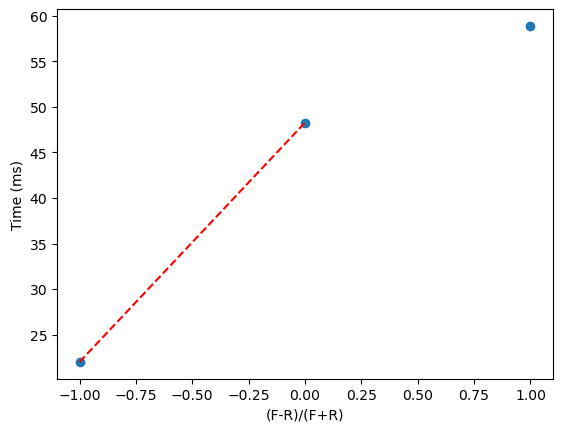

In [185]:
x2_line = arange(min(x2), max(x2), 1)
y2_line = objective(x2_line, a, b, c)

plt.plot(x2_line, y2_line, '--', color='red')
plt.scatter(x = '(F-R)/(F+R)', y = 'Time', data = df_calc)
plt.ylabel("Time (ms)")
plt.xlabel("(F-R)/(F+R)")
plt.show()